<a href="https://colab.research.google.com/github/Abdullah12389/Multimart/blob/main/Annomly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/financial_anomaly_data.csv')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(216960, 7)

In [ ]:
df.shape[0]/df['TransactionID'].nunique()

108.53426713356679

In [ ]:
df['Merchant'].unique()

array(['MerchantH', 'MerchantE', 'MerchantI', 'MerchantC', 'MerchantD',
       'MerchantB', 'MerchantJ', 'MerchantA', 'MerchantG', 'MerchantF'],
      dtype=object)

In [ ]:
df['TransactionID'].unique().shape

(1999,)

In [ ]:
df["Timestamp"]=pd.to_datetime(df["Timestamp"],format="mixed")

In [ ]:
df["date"]=df["Timestamp"].dt.day
df['month']=df['Timestamp'].dt.month
df["day"]=df["Timestamp"].dt.day_name()
df["isHoliday"]=np.where(df['day']=="Sunday",1,0)

In [ ]:
df["after_days"]=df["date"]*df["month"]

In [ ]:
df.drop(columns=["day","date","month"],inplace=True)

In [ ]:
df=df.drop(columns=['Timestamp'])

In [ ]:
df.drop(columns=["TransactionID"],inplace=True)

In [ ]:
df["after_days"]=df["after_days"][1]-df["after_days"][0]

In [ ]:
df.drop(columns=["after_days","AccountID"],inplace=True)

In [ ]:
data=pd.get_dummies(df,columns=["Merchant","TransactionType","Location"],dtype=int)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
num_features=data[["Amount"]]

In [ ]:
num_features

,Amount
0,95071.92
1,15607.89
2,65092.34
3,87.87
4,716.56
...,...
216955,62536.88
216956,68629.69
216957,8203.57
216958,77800.36


In [ ]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(num_features)

In [ ]:
features=scaler.get_feature_names_out()

In [ ]:
data=data.drop(columns=["Amount"])
scaled_df=pd.DataFrame(x_scaled,columns=features)

In [ ]:
data=pd.concat([data,scaled_df],axis=1)

In [ ]:
dbscan=DBSCAN(eps=0.2,min_samples=6)

In [ ]:
small=data[:20000]

In [ ]:
dbscan.fit(small)

DBSCAN(eps=0.2, min_samples=6)

In [ ]:
np.unique(dbscan.labels_,return_counts=True)

(array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176

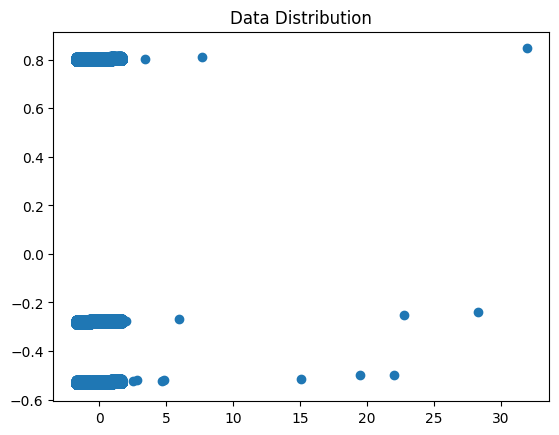

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(reduced[:,0], reduced[:,1])
plt.title("Data Distribution")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
reduced=pca.fit_transform(data)

In [ ]:
reduced

array([[ 1.54909605, -0.52456223],
       [-1.18281874, -0.52014717],
       [ 0.51398248, -0.27179686],
       ...,
       [-1.43752967, -0.52882322],
       [ 0.95433229, -0.53143617],
       [ 0.50926688, -0.27755073]])

#using One class SVM

In [ ]:
data=pd.read_csv("/content/reference.csv")

In [ ]:
data["timestamp"]=pd.to_datetime(data["timestamp"],format="mixed")

In [ ]:
data["day"]=data['timestamp'].dt.day_name()
data["isHoliday"]=np.where(data['day']=="Sunday",1,0)
data.drop(columns=["day"],inplace=True)

In [ ]:
data["time_of_day"]=data["timestamp"].dt.hour

In [ ]:
data["time_of_day"]=np.where((data["time_of_day"]>=0) & (data["time_of_day"]<=6),"midnignt",np.where((data["time_of_day"]>=7) & (data["time_of_day"]<=12),"morning",np.where((data["time_of_day"]>=13) & (data["time_of_day"]<=18),"afternoon","night")))

In [ ]:
data.drop(columns=["timestamp"],inplace=True)

In [ ]:
data["transaction_type"].fillna("missing",inplace=True)

<ipython-input-229-a71d11957590>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["transaction_type"].fillna("missing",inplace=True)


In [ ]:
data["is_first_transaction"]=np.where(data["is_first_transaction"]==True,1,0)

In [ ]:
y=data[["predicted_fraud","is_fraud","predicted_fraud_proba"]]

In [ ]:
df_cat=pd.get_dummies(data,columns=["transaction_type","time_of_day"],dtype=int)

In [ ]:
num=data[["time_since_login_min","transaction_amount","user_tenure_months"]]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
scaled=scaler.fit_transform(num)
features=scaler.get_feature_names_out()
num_data=pd.DataFrame(scaled,columns=features)

In [ ]:
transdata=pd.concat([df_cat.drop(columns=["time_since_login_min","transaction_amount","user_tenure_months"]),num_data],axis=1)

In [ ]:
from sklearn.ensemble import IsolationForest
isolate=IsolationForest(n_estimators=100,contamination=0.5)
isolate.fit(transdata)

IsolationForest(contamination=0.5)

In [ ]:
ypred=isolate.predict(transdata)

In [ ]:
ytest=np.where(y["predicted_fraud"]==1,-1,1)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[12489, 11873],
       [12614, 13231]])

In [ ]:
transdata.drop(columns=["is_fraud"],inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
rf=RandomForestClassifier(n_estimators=100)
lr=LogisticRegression()

In [ ]:
lr.fit(transdata,y_lr)

LogisticRegression()

In [ ]:
x_rf=pd.concat([transdata,y["predicted_fraud_proba"]],axis=1)

In [ ]:
rf.fit(x_rf,y_lr)

RandomForestClassifier()

In [ ]:
lr_pred=lr.predict_proba(transdata)[:,1]

In [ ]:
ypred=rf.predict(pd.concat([transdata,pd.Series(lr_pred,name="predicted_fraud_proba")],axis=1))

In [ ]:
pd.concat([transdata,pd.Series(lr_pred,name="pred")],axis=1)

,is_first_transaction,isHoliday,transaction_type_CASH-IN,transaction_type_CASH-OUT,transaction_type_PAYMENT,transaction_type_TRANSFER,transaction_type_missing,time_of_day_afternoon,time_of_day_midnignt,time_of_day_morning,time_of_day_night,time_since_login_min,transaction_amount,user_tenure_months,pred
0,0,0,0,0,1,0,0,0,1,0,0,-0.773585,0.498380,-1.905501,0.901627
1,0,0,0,0,1,0,0,0,1,0,0,-0.569524,-0.832064,0.142550,0.451656
2,0,0,1,0,0,0,0,0,1,0,0,1.117236,-0.480574,-1.771641,0.870850
3,0,0,0,1,0,0,0,0,1,0,0,0.985462,-0.343028,-1.800818,0.875828
4,0,0,1,0,0,0,0,0,1,0,0,0.556938,-0.410894,0.476029,0.376097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50202,0,0,0,0,0,0,1,0,0,0,1,0.244467,1.512345,0.889970,0.353781
50203,1,0,0,0,1,0,0,0,0,0,1,0.551297,-0.618169,-1.684973,0.856440
50204,0,0,1,0,0,0,0,0,0,0,1,1.457244,-0.417023,-1.745229,0.869673
50205,0,0,0,0,1,0,0,0,0,0,1,-0.588757,1.514208,0.189298,0.530959


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(np.array(y["is_fraud"]),ypred)

array([[19802,  5314],
       [10349, 14742]])

In [ ]:
np.array(y["is_fraud"])

array([1., 0., 1., ..., 1., 0., 0.])

In [ ]:
import pickle
with open("predict_fraud_rf.pkl","wb") as f:
  pickle.dump(rf,f)
f.close()
with open("predict_fraud_lr.pkl","wb") as f:
  pickle.dump(lr,f)
f.close()
